**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [5]:
# Import the dataset
import os 
os.chdir("C:\\Users\\tirth\\Technocolabs\\project 2\\Data set")

df = pd.read_csv('cleaned_data.csv')

In [13]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]
bill_amt_feats = df[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]


____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [15]:
bill_feats

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
26659,188948,192815,208365,88004,31237,15980
26660,1683,1828,3502,8979,5190,0
26661,3565,3356,2758,20878,20582,19357
26662,-1645,78379,76304,52774,11855,48944


In [16]:
bill_amt_feats

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
26659,8500,20000,5003,3047,5000,1000
26660,1837,3526,8998,129,0,0
26661,0,0,22000,4200,2000,3100
26662,85900,3409,1178,1926,52964,1804


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D4FBF3C10>,
      dtype=object)

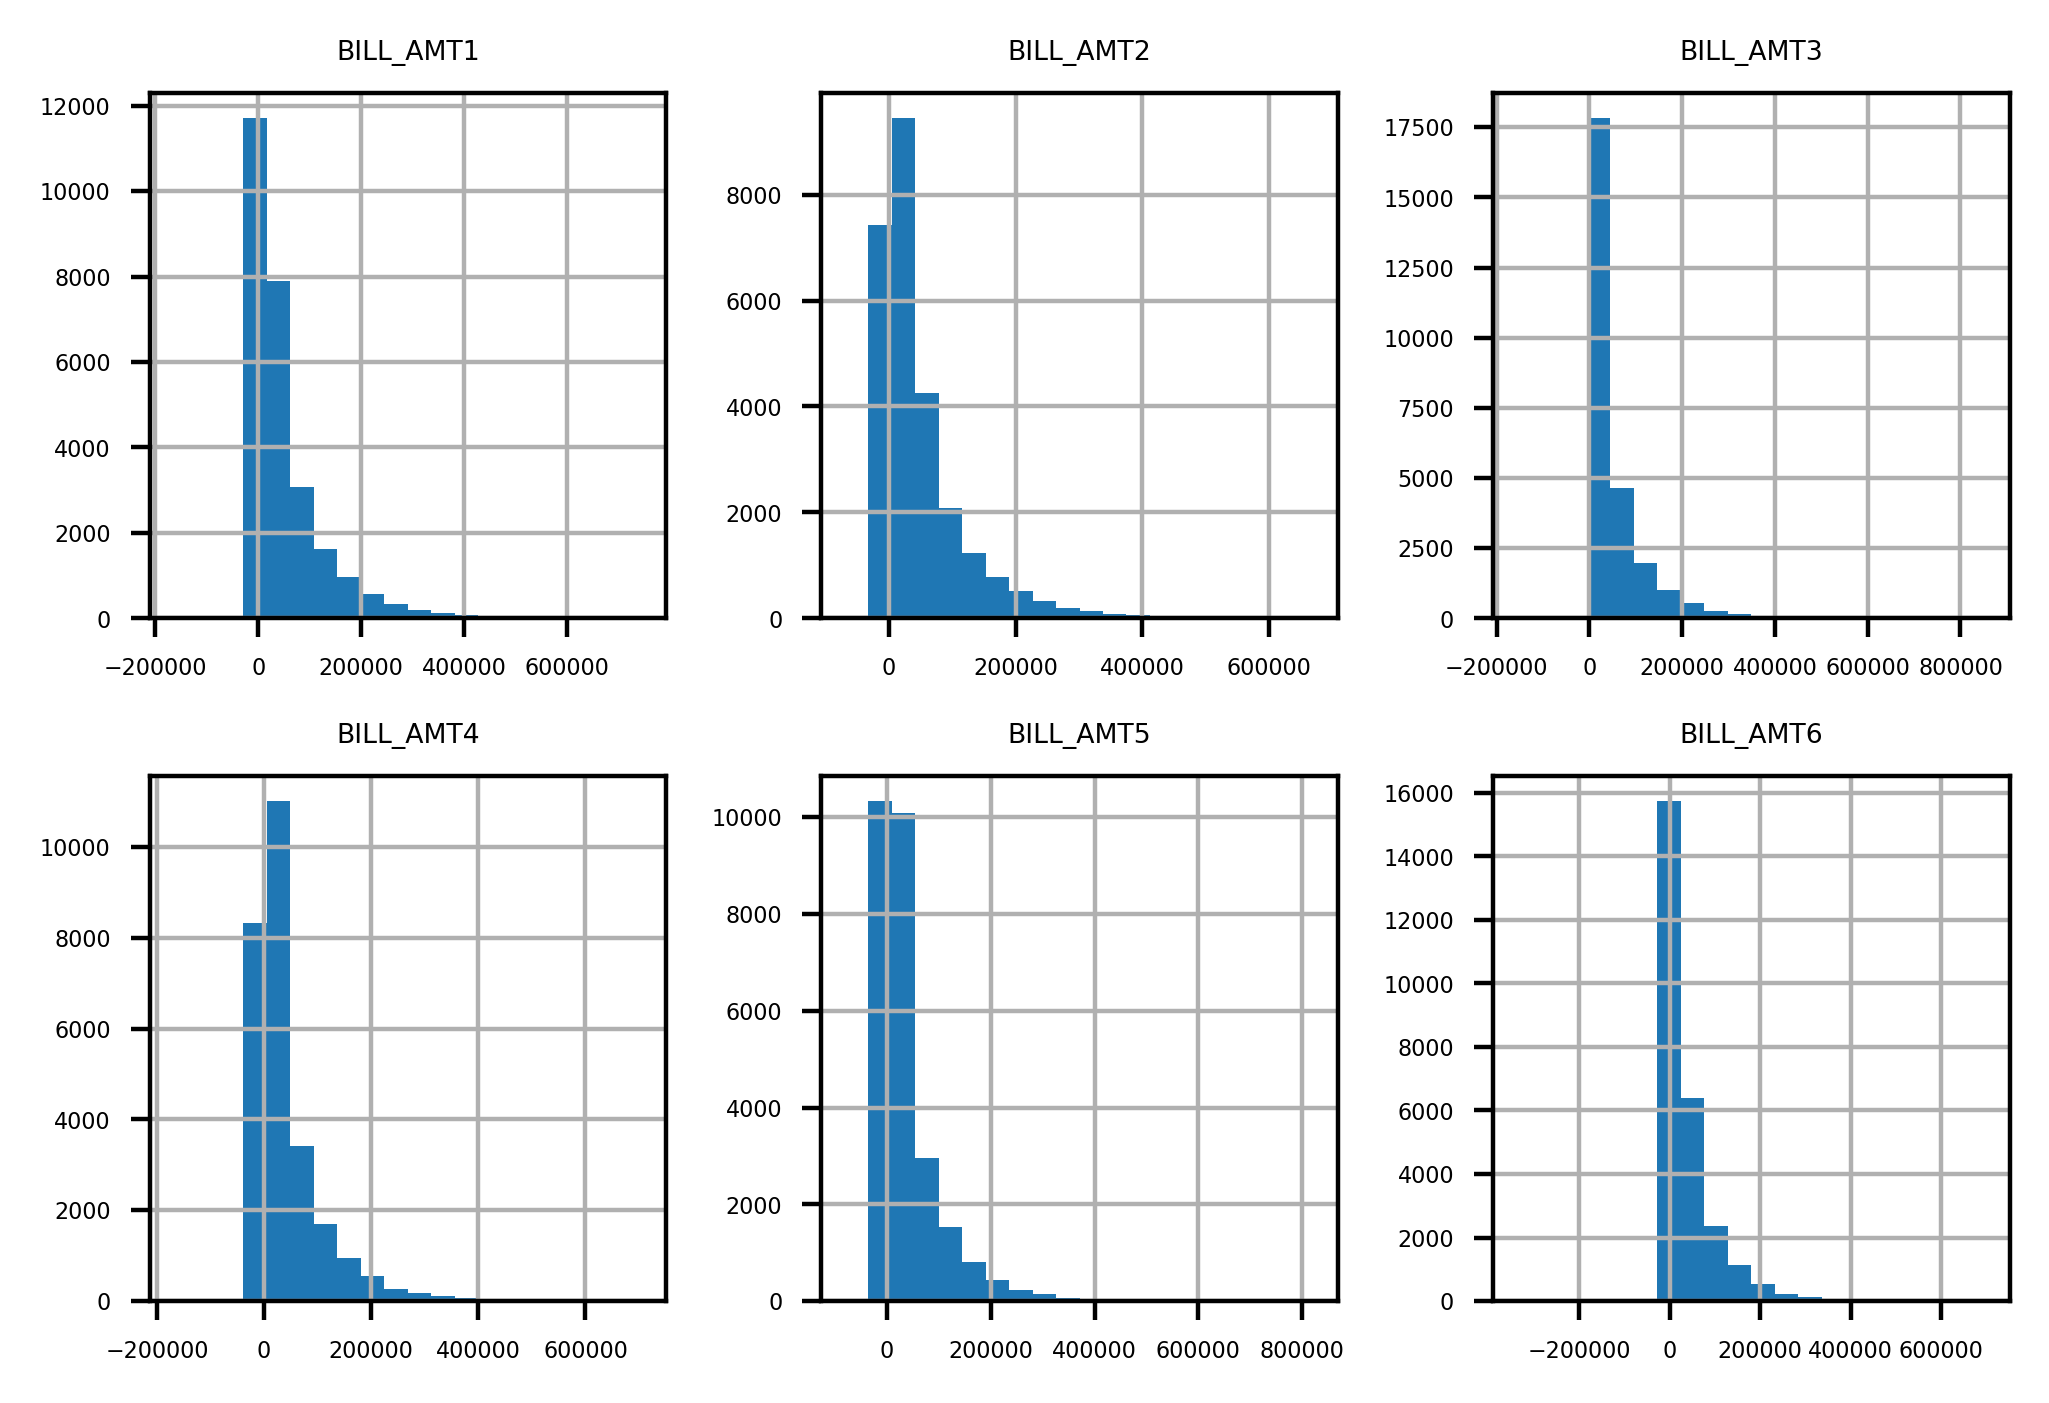

In [24]:
bill_feats.hist(bins=20,layout=(2,3))

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [18]:
bill_amt_feats.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D4DFD85B0>,
      dtype=object)

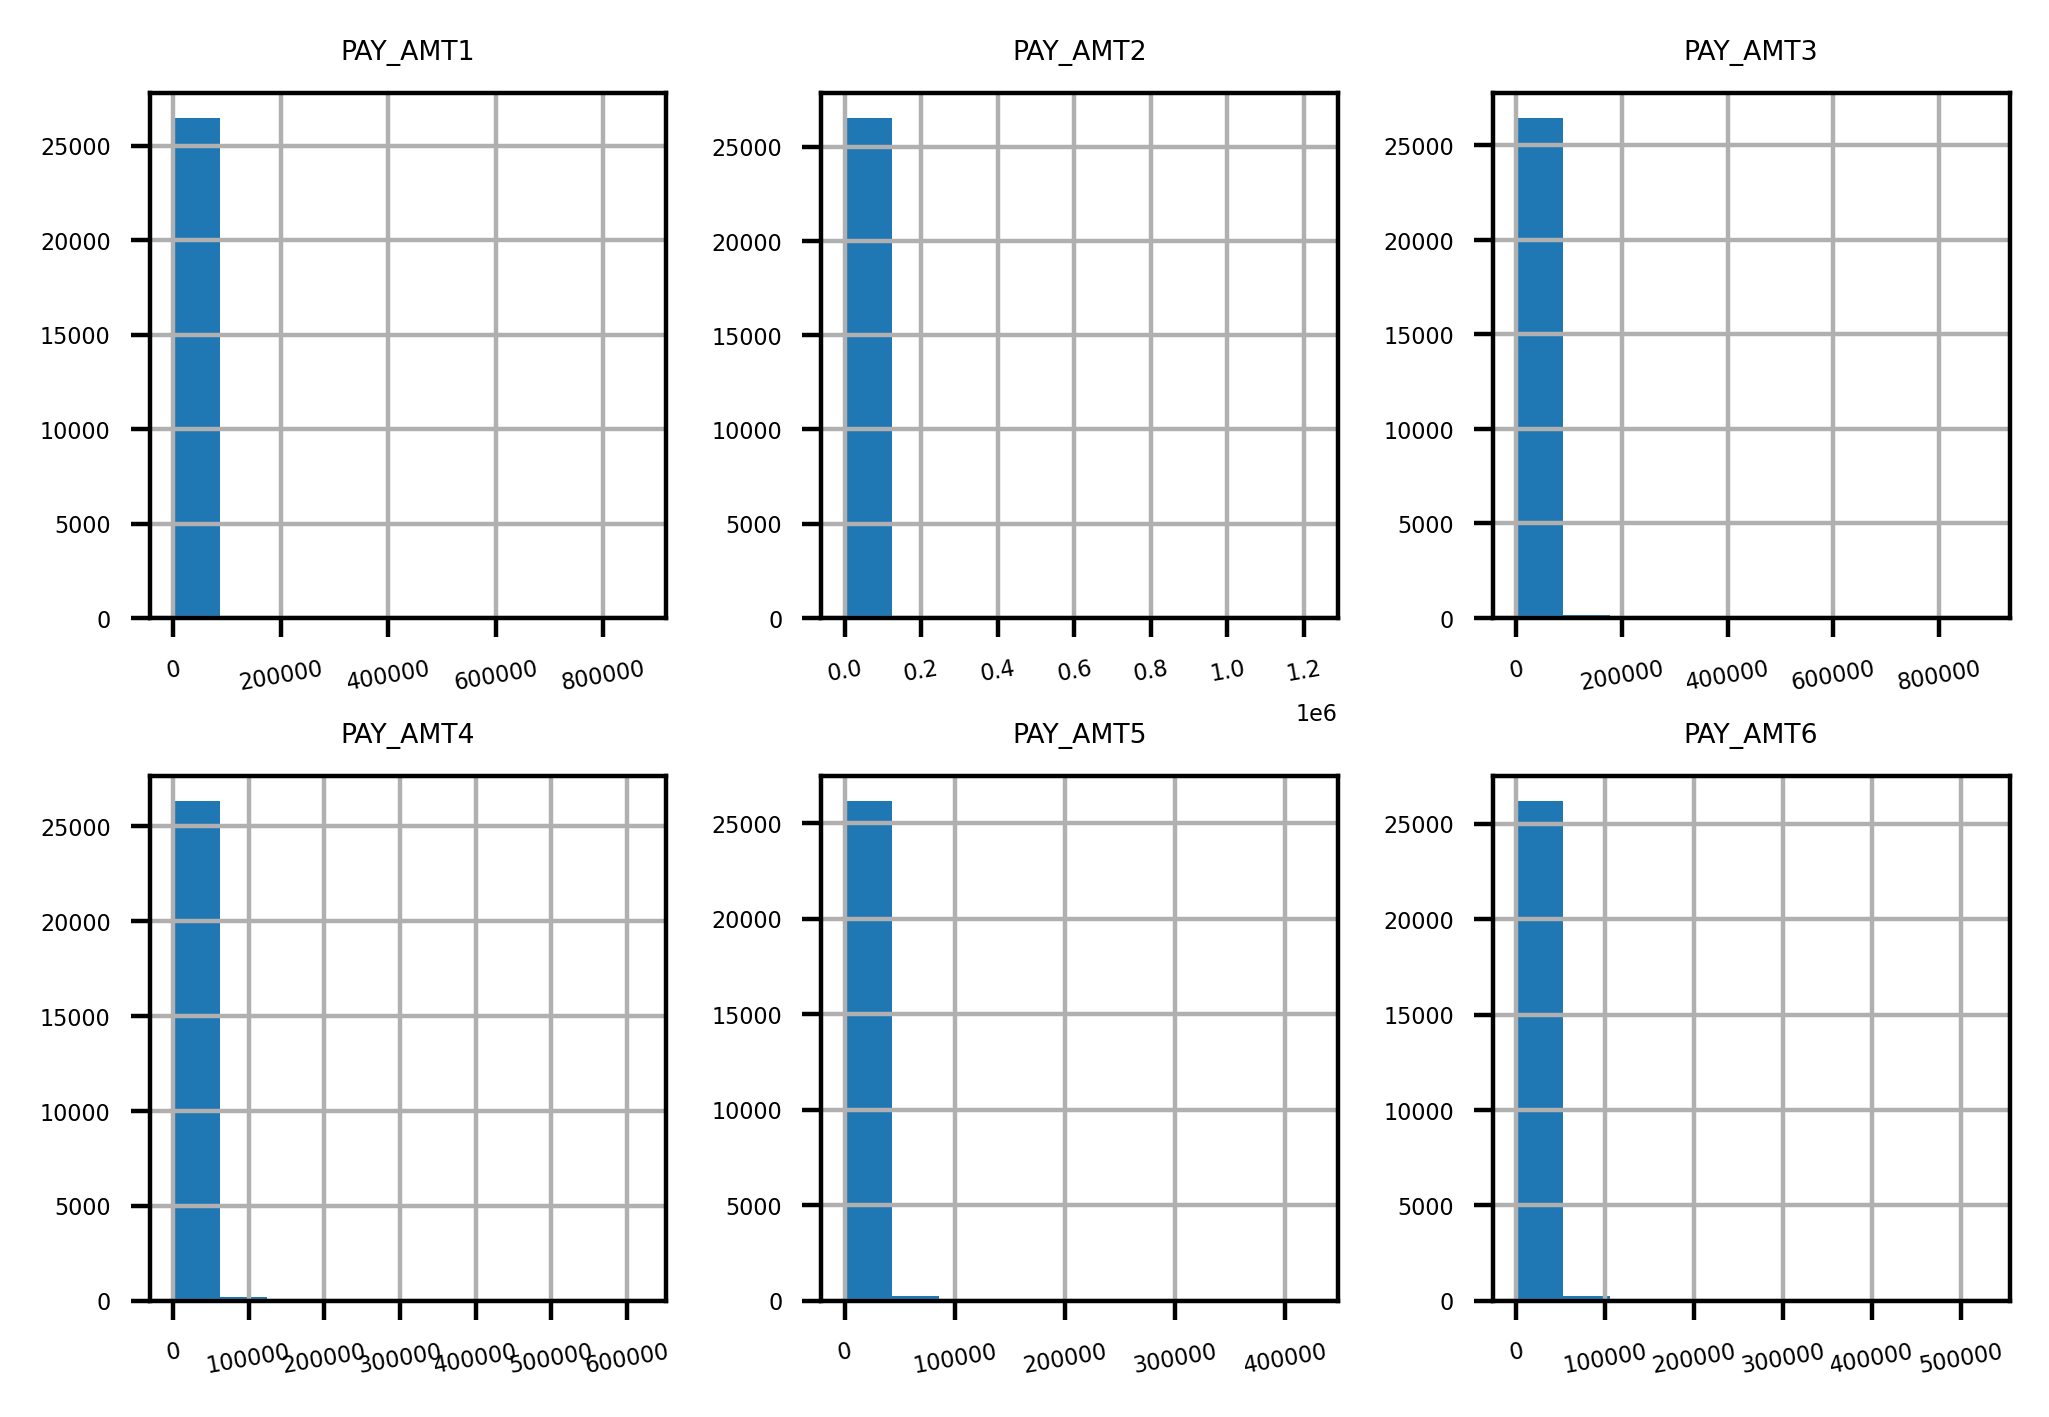

In [26]:
bill_amt_feats.hist(xrot=10,layout=(2,3))

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [32]:
# Create Boolean mask
billamt_zero_mask = bill_amt_feats == 0
zero_mask = billamt_zero_mask.iloc[:,1:].all(axis=1)

In [33]:
# Use `.head()`
zero_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [34]:
# Use `.sum()`
sum(zero_mask)

1672

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [37]:
x = bill_amt_feats.apply(lambda x: np.log10(x+1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D532502E0>,
      dtype=object)

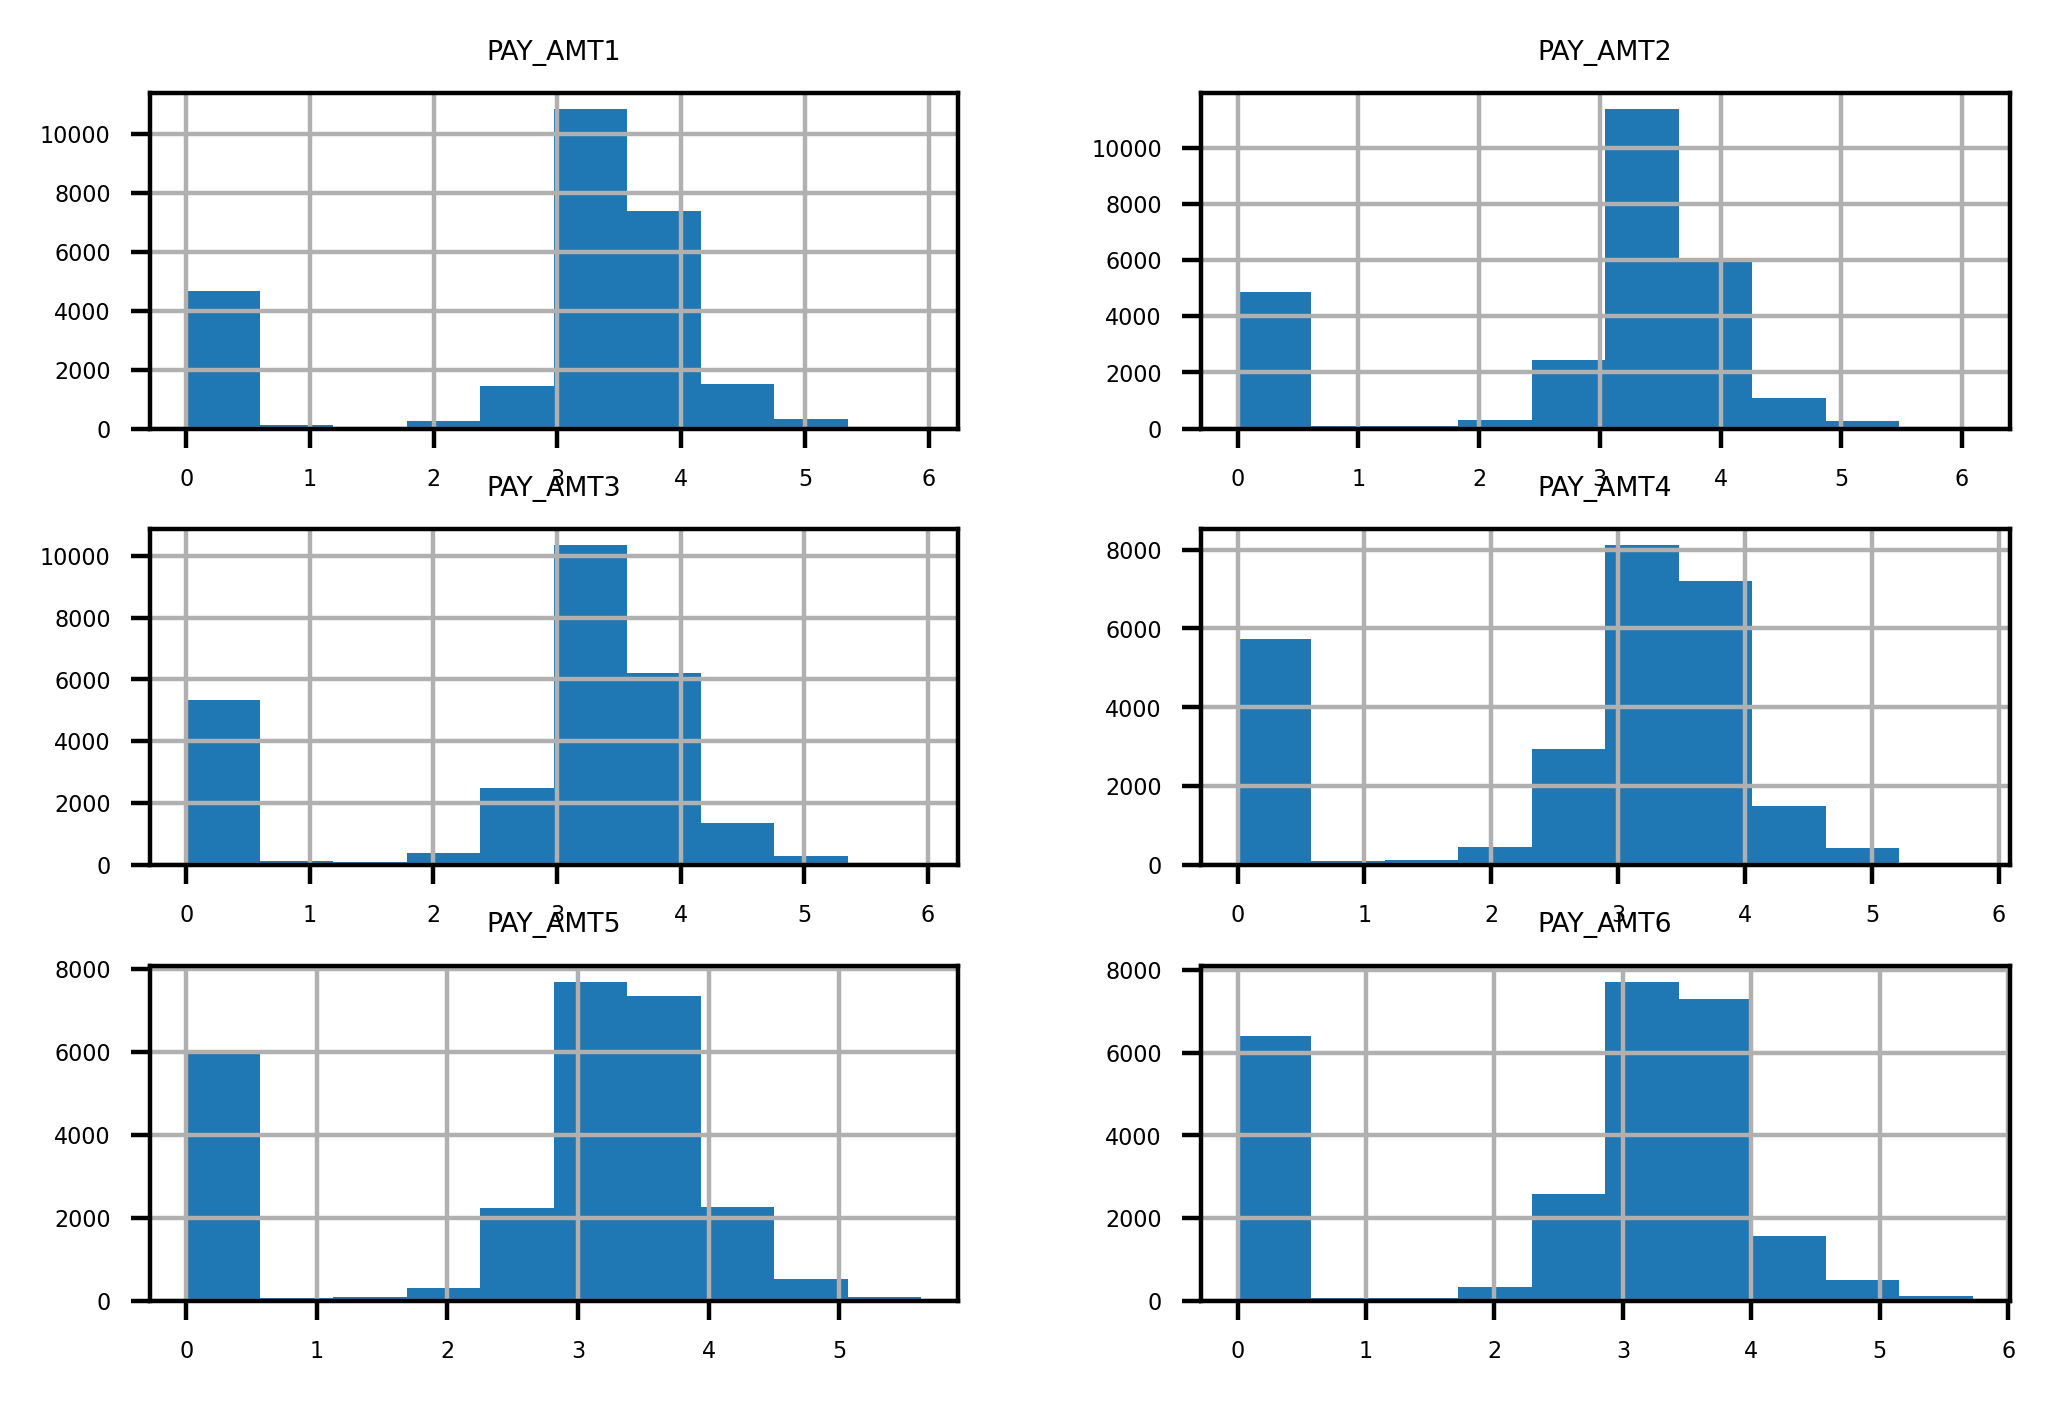

In [38]:
x.hist()